In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/home/eleve/Dokuments/Prepa/TIPE/encephalon')
from encephalon import NN,Id

In [3]:
with open("/home/eleve/Dokuments/Prepa/TIPE/Percepton analogique/Data_dogs_cats.txt","r",encoding="utf8") as FichierDonnees:
    liste_a = list()
    liste_b = list()
    liste_c = list()
    liste_d = list()
    
    liste_chien_a = list()
    liste_chien_b = list()
    liste_chien_c = list()
    
    liste_chat_a = list()
    liste_chat_b = list()
    liste_chat_c = list()
    
    
    for line in FichierDonnees:
        if "#" in line :
        # on saute la ligne
            continue
        donnees = line.split()
        liste_a.append(float(donnees[0]))
        liste_b.append(float(donnees[1]))
        liste_c.append(float(donnees[2]))
        liste_d.append(int(donnees[3]))
        
        if (donnees[3]=="1"):
            liste_chien_a.append(float(donnees[0]))
            liste_chien_b.append(float(donnees[1]))
            liste_chien_c.append(float(donnees[2]))
        else:
            liste_chat_a.append(float(donnees[0]))
            liste_chat_b.append(float(donnees[1]))
            liste_chat_c.append(float(donnees[2]))
          
Data_X = np.zeros((3,len(liste_a)), dtype=float)
Data_chien = np.zeros((3,len(liste_chien_a)), dtype=float)
Data_chat = np.zeros((3,len(liste_chat_a)), dtype=float)


Data_X[0]=liste_a
Data_X[1]=liste_b
Data_X[2]=liste_c

Data_chien[0]=liste_chien_a
Data_chien[1]=liste_chien_b
Data_chien[2]=liste_chien_c

Data_chat[0]=liste_chat_a
Data_chat[1]=liste_chat_b
Data_chat[2]=liste_chat_c

Data_X = Data_X.transpose()
Data_chien = Data_chien.transpose()
Data_chat = Data_chat.transpose()

Data_Etiquette = np.array(liste_d)
Data_Etiquette = np.where(Data_Etiquette==0, -1 ,Data_Etiquette) # remplacement des 0 par des -1 pour les chats...

test = Data_X[0:50,0:2]
test2 = Data_Etiquette[0:50]

donnees = Data_X[:,0:2]

In [4]:
sign = (lambda x: np.where(x >= 0, 1, -1), lambda x,y: 0)

perceptron = NN([2,1],name="perceptron_analogique",f=Id,g=Id)

In [6]:
perceptron.train(donnees,Data_Etiquette,10000,learning_rate=0.01)

epoch 10/10000   error=0.179331
epoch 20/10000   error=0.179331
epoch 30/10000   error=0.179331
epoch 40/10000   error=0.179331
epoch 50/10000   error=0.179331
epoch 60/10000   error=0.179331
epoch 70/10000   error=0.179331
epoch 80/10000   error=0.179331
epoch 90/10000   error=0.179331
epoch 100/10000   error=0.179331
epoch 110/10000   error=0.179331
epoch 120/10000   error=0.179331
epoch 130/10000   error=0.179331
epoch 140/10000   error=0.179331
epoch 150/10000   error=0.179331
epoch 160/10000   error=0.179331
epoch 170/10000   error=0.179331
epoch 180/10000   error=0.179331
epoch 190/10000   error=0.179331
epoch 200/10000   error=0.179331
epoch 210/10000   error=0.179331
epoch 220/10000   error=0.179331
epoch 230/10000   error=0.179331
epoch 240/10000   error=0.179331
epoch 250/10000   error=0.179331
epoch 260/10000   error=0.179331
epoch 270/10000   error=0.179331
epoch 280/10000   error=0.179331
epoch 290/10000   error=0.179331
epoch 300/10000   error=0.179331
epoch 310/10000   e

KeyboardInterrupt: 

W1: -7.399541735660386 , W2: -0.37184260324846624 , b:   9.78798205149407
R1: -135.14350424982814 , R2: -2689.3099157112915 , Rd2: 1877.9639955575904


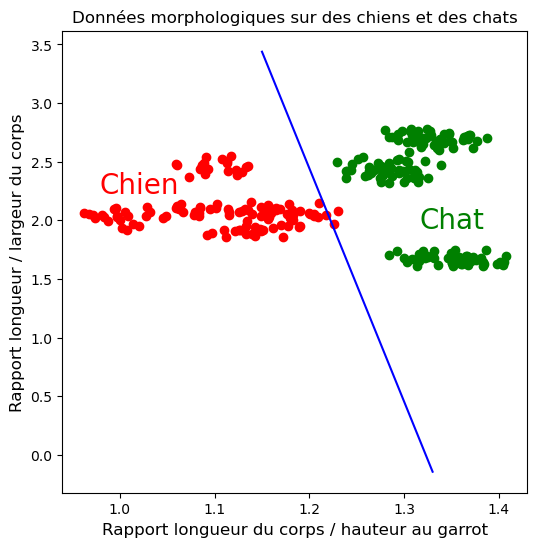

In [7]:
def convertion(W1,W2,b):
    Ra = 10**3
    Rd1 = 10**3
    V = 15
    return Ra/W1 , Ra/W2, Rd1/(V/b - 1)
W1,W2,b = perceptron.W[1][0][0],perceptron.W[1][1][0],perceptron.b[1][0][0]
R1,R2,Rd2 = convertion(W1,W2,b)
print(f"W1: {W1} , W2: {W2} , b:   {b}\nR1: {R1} , R2: {R2} , Rd2: {Rd2}")

def Droite_decision(x, W1,W2, b):
    return -(W1/W2)*x - b/W2
X = np.arange(1.15 , 1.33 , 0.01)
Y = Droite_decision(X, W1,W2, b)

plt.rcParams['figure.figsize'] = [6, 6]

plt.plot(X,Y,'b')

plt.scatter(Data_chien[:,0], Data_chien[:,1], c='r')
plt.scatter(Data_chat[:,0], Data_chat[:,1], c='g')
plt.text(1.02, 2.3, 'Chien', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20, color = 'r')
plt.text(1.35, 2, 'Chat', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20, color = 'g')

plt.title('Données morphologiques sur des chiens et des chats', fontsize=12)
plt.xlabel("Rapport longueur du corps / hauteur au garrot", fontsize=12)
plt.ylabel('Rapport longueur / largeur du corps', fontsize=12)

plt.show()